In [1]:
# Notebook to study the gammas emmited from the 2nubb events
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from matplotlib.colors import LogNorm  # Import LogNorm for logarithmic color scale
from matplotlib.cm import get_cmap

# Create a sequential colormap
cmap = get_cmap('Spectral')  # You can choose any sequential colormap here

plt.rcParams['figure.facecolor'] = 'w'

# plt.rcParams["font.size"] = 15
# plt.rcParams["figure.figsize"] = 11,9

## Load in the files and print info

In [2]:
# Loading in the files
files = []

mode = "esmeralda"

# if (mode == "nexus"):
#     files.append("../data/nexus/LPR_Tl208_Ports/NEXT100_LPR_Tl208_PORT1a_slim.h5") # LPR Port 1A event
# else:
#     files.append("../data/nexus/LPR_Tl208_Ports/NEXT100_LPR_Tl208_PORT1a_esmeralda_slim.h5") # LPR Port 1A event


files.append("../data/nexus/LPR_Tl208_Ports/NEXT100_Tl208_Port1a_sophronia_4bar.h5")

print(files)

config_v = []
parts_v  = []
hits_v   = []
chits_v = []
 
for index, f in enumerate(files):
    
    if (mode == "nexus"):
        config_v.append(pd.read_hdf(f, 'config'))
    else:
        chits_v.append(pd.read_hdf(f, 'RECO/Events',  columns = ["event", "X", "Y", "Z", "Ec"]))

    
    parts_v .append(pd.read_hdf(f, 'MC/particles', columns = ["event_id", "particle_id", "mother_id","particle_name", "creator_proc", "final_proc", "kin_energy", "initial_volume", "final_volume", "final_x", "final_y", "final_z"]))
    hits_v  .append(pd.read_hdf(f, 'MC/hits',  columns = ["event_id", "x", "y", "z", "energy", "particle_id"]))
    
if (mode == "nexus"):
    display(config_v[0])
else:
    # Divide the event numbers for the reco by two
    chits_v[0].event = chits_v[0].event//2 # Double slash is integer division
    
    display(chits_v[0])



['../data/nexus/LPR_Tl208_Ports/NEXT100_Tl208_Port1a_sophronia_4bar.h5']


,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
0,5000,1.000136e+10,2,233.820698,226.235868,1,381.175,307.625,0.0,0.0,814.762329,5.275362,3188.000000,-1.0,0.012644,-1,-1.0
1,5000,1.000136e+10,2,233.820698,226.235868,1,366.625,276.525,0.0,0.0,815.627014,5.043478,756.306858,-1.0,0.002036,-1,-1.0
2,5000,1.000136e+10,2,233.820698,226.235868,1,381.175,292.075,0.0,0.0,815.627014,5.159420,773.693142,-1.0,0.002442,-1,-1.0
3,5000,1.000136e+10,2,233.820698,226.235868,1,396.725,276.525,0.0,0.0,818.230103,6.550725,1964.000000,-1.0,0.007219,-1,-1.0
4,5000,1.000136e+10,2,233.820698,226.235868,1,396.725,260.975,0.0,0.0,819.118835,6.724638,1147.000000,-1.0,0.003930,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49236784,1090033,2.180068e+12,1,-163.389057,29.238923,1,-158.075,29.225,0.0,0.0,1164.479492,9.333333,1895.129635,-1.0,0.003947,-1,-1.0
49236785,1090033,2.180068e+12,1,-163.389057,29.238923,1,-158.075,44.775,0.0,0.0,1167.088257,5.797101,2238.829754,-1.0,0.004642,-1,-1.0
49236786,1090033,2.180068e+12,1,-163.389057,29.238923,1,-142.525,29.225,0.0,0.0,1167.088257,5.101449,1970.170246,-1.0,0.004094,-1,-1.0
49236787,1090033,2.180068e+12,1,-163.389057,29.238923,1,-173.625,29.225,0.0,0.0,1169.708130,7.420290,2891.000000,-1.0,0.006021,-1,-1.0


In [3]:
print("Total MC Events:", len(parts_v[0].event_id.unique()))

Total MC Events: 40309


In [5]:
## Particles
pd.set_option('display.max_rows', 20)  # Change 1000 to your desired maximum number
pd.set_option('display.max_rows', 50) 
display(parts_v[0][parts_v[0].event_id == 1090033])
display(hits_v[0][hits_v[0].event_id == 1090033])

# Get the MC scale factor
# The data source rate is 5kBq and trigger efficiency is 97%
# Normalize the total data rate with the total generated MC events
# Scale everything to a total length of a calibration day which is 24hr
# There was 10k events and 300 files generated for the MC campaign
scale_factor = (5000*24*60*60*0.97)/(300*10e3)
scale_factor = 1
print("MC Scale Factor: ", scale_factor)


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
3791478,1090033,1,Tl208,True,0,399.118256,401.148895,563.927368,0.000000,399.118256,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,none,RadioactiveDecay
3791479,1090033,4,e-,False,1,399.118256,401.148895,563.927368,0.000027,399.102997,...,-0.233916,-0.021199,-0.826027,0.000000,-0.000000,0.000000,0.488304,0.230335,RadioactiveDecay,NoProcess
3791480,1090033,3,anti_nu_e,False,1,399.118256,401.148895,563.927368,0.000027,12500.000000,...,0.809507,-0.644162,-0.044755,0.809507,-0.644162,-0.044755,1.035494,15479.046875,RadioactiveDecay,Transportation
3791481,1090033,2,Pb208[3475.078],False,1,399.118256,401.148895,563.927368,0.000027,399.118256,...,-0.575591,0.665360,0.870781,-0.000000,0.000000,0.000000,0.000004,0.000000,RadioactiveDecay,RadioactiveDecay
3791482,1090033,6,gamma,False,2,399.118256,401.148895,563.927368,0.000027,-559.629395,...,-0.730206,-0.261184,0.373008,-0.000000,0.000000,-0.000000,0.860554,1137.254883,RadioactiveDecay,phot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791571,1090033,47134,e-,False,37180,335.172607,365.224670,390.520508,3.413722,335.184143,...,-0.199820,0.213673,-0.286239,-0.000000,0.000000,-0.000000,0.143705,0.140894,compt,NoProcess
3791572,1090033,54290,e-,False,18,265.198578,141.948822,533.013733,1.318360,265.078827,...,0.017397,0.106441,-0.022174,-0.000000,0.000000,0.000000,0.011728,0.402201,eIoni,NoProcess
3791573,1090033,67629,e-,False,18,272.089996,163.653305,505.502258,1.862417,272.112305,...,-0.049523,0.056096,-0.085012,0.000000,0.000000,0.000000,0.012400,0.562829,eIoni,NoProcess
3791574,1090033,18,e-,False,17,273.207214,137.366776,596.784851,0.981149,238.467636,...,-0.825269,-0.607036,-0.556837,0.000000,0.000000,-0.000000,0.762087,310.169312,conv,NoProcess


,event_id,particle_id,hit_id,x,y,z,time,energy,label
45199132,1090033,20,0,273.207214,137.366455,596.785095,1.202121,0.000002,ACTIVE
45199133,1090033,19,0,272.845154,136.480423,597.051880,0.984735,0.003663,ACTIVE
45199134,1090033,19,1,272.870117,135.505295,596.954468,0.988273,0.004006,ACTIVE
45199135,1090033,19,2,272.912201,134.508240,596.951843,0.991877,0.001123,ACTIVE
45199136,1090033,19,3,272.811584,133.514343,596.969360,0.995485,0.003843,ACTIVE
...,...,...,...,...,...,...,...,...,...
45200266,1090033,47130,0,-203.658234,39.366547,1318.061768,7.798240,0.000045,BUFFER
45200267,1090033,47129,0,-203.658218,39.366684,1318.061890,7.798219,0.000023,BUFFER
45200268,1090033,47128,0,-203.658188,39.366768,1318.061768,7.798191,0.000010,BUFFER
45200269,1090033,47127,0,-203.658829,39.366653,1318.062622,7.798256,0.000551,BUFFER


MC Scale Factor:  1


# Identify if events were compton scatter or pair conversion
- We are only interested in the pair conversion events
- Compton scatter events are a background because we dont know the primary event energy

In [6]:
prim_gammas = parts_v[0][ (parts_v[0].particle_name == "gamma") & ( round(parts_v[0].kin_energy) == round(2.6145043)) ] # Primary gammas
prim_gammas = prim_gammas[["event_id", "particle_id"]]
prim_gammas.rename(columns={'particle_id': 'pgam_id'}, inplace=True)

# This gets rid of the small fraction of events that do not have the 2.6 MeV gamma (0.01%)
parts_v[0] = parts_v[0][parts_v[0].event_id.isin(prim_gammas.event_id.unique())]

merged_df = pd.merge(parts_v[0], prim_gammas, on='event_id', how='inner')


daughters = merged_df[ merged_df.mother_id == merged_df.pgam_id  ]
# If the primary electron is the direct decendant from the gamma, its particle id should be sequential
display(daughters[ (daughters.creator_proc == "phot") & (daughters.particle_id == daughters.pgam_id+1)])
photopeak_ev_ids = daughters[(daughters.creator_proc == "phot") & (daughters.particle_id == daughters.pgam_id+1)].event_id.unique()
pair_ev_ids      = daughters[(daughters.creator_proc == "conv") & (daughters.particle_id == daughters.pgam_id+1)].event_id.unique()
compt_ev_ids     = daughters[(daughters.creator_proc == "compt") & (daughters.particle_id == daughters.pgam_id+1)].event_id.unique()

print(len(photopeak_ev_ids) + len(pair_ev_ids) + len(compt_ev_ids))


# Get the event id's where the gamma pair coverted. These are the signal events, all others are bkg
# pair_cov_gamma_ev_ids = prim_gammas[prim_gammas.final_proc == "conv"].event_id.unique()


print(len(parts_v[0].event_id.unique()), len(prim_gammas.event_id.unique()))


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc,pgam_id
1330,5014,20,e-,False,19,-130.796371,-304.473633,776.657104,3.028055,-57.843563,...,-2.741399,-1.178238,0.0,0.0,0.0,2.613356,855.498291,phot,NoProcess,19
8008,55010,27,e-,False,26,257.875946,345.794769,587.899170,0.513324,262.105927,...,-2.686025,1.430946,0.0,0.0,-0.0,2.579939,1056.462158,phot,NoProcess,26
19113,5010006,4543,e-,False,4542,71.904182,45.535442,517.668213,1.619680,176.021805,...,-1.139344,-1.444097,0.0,-0.0,-0.0,2.613356,1007.647339,phot,NoProcess,4542
21186,5010030,32,e-,False,31,232.114197,64.134079,701.132751,1.337030,-159.582428,...,-2.361253,1.728107,0.0,0.0,-0.0,2.579939,1081.282959,phot,NoProcess,31
23142,5015020,32,e-,False,31,-92.520775,74.224052,421.047913,2.025743,-107.555305,...,-1.324277,-1.302404,-0.0,0.0,0.0,2.579939,978.885986,phot,NoProcess,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772797,1005032,28,e-,False,27,32.730686,167.825760,630.726257,1.470701,-182.270203,...,-1.066447,0.188638,0.0,-0.0,-0.0,2.579939,847.945190,phot,NoProcess,27
3775073,110016,25,e-,False,24,66.039490,80.874481,917.046631,1.940758,-91.858749,...,-2.566552,1.409893,0.0,0.0,-0.0,2.579939,1056.313232,phot,NoProcess,24
3776034,110027,10870,e-,False,10869,188.931625,93.008965,609.024658,1.253338,433.172028,...,-2.326022,-0.565689,0.0,0.0,0.0,2.579939,383.661469,phot,NoProcess,10869
3780963,1070034,17,e-,False,16,399.656586,-20.375565,493.990753,1.428187,294.801208,...,-2.958076,-0.682596,0.0,0.0,0.0,2.579939,1057.755249,phot,NoProcess,16


40322
40305 40305


In [8]:
evt = parts_v[0][parts_v[0].event_id == 1090033	]
elec = evt[(evt.particle_name == "e-")]
gam  = evt[(evt.particle_name == "gamma")]

elec = elec[elec.particle_id.isin(gam.particle_id+1)]
# gam_par = evt[ (evt.particle_id.isin(elec.mother_id.unique())) & (evt.particle_name == "gamma")]

print(len(gam), len(elec))

display(elec.sort_values(by='particle_id'))
display(gam.sort_values(by='particle_id'))
display(evt.sort_values(by='particle_id'))

7 5


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
3791491,1090033,7,e-,False,6,-538.344604,65.831749,1042.807617,3.685269,-538.367371,...,-0.153717,0.167640,-0.005229,-0.0,-0.0,0.0,0.048357,0.043474,compt,NoProcess
3791483,1090033,12,e-,False,6,-559.629395,65.903343,1051.229492,3.793501,-559.629456,...,-0.019323,0.010276,0.021936,-0.0,0.0,0.0,0.000939,0.000012,phot,NoProcess
3791574,1090033,18,e-,False,17,273.207214,137.366776,596.784851,0.981149,238.467636,...,-0.825269,-0.607036,-0.556837,0.0,0.0,-0.0,0.762087,310.169312,conv,NoProcess
3791519,1090033,37182,e-,False,37181,221.709961,-47.167767,689.618652,2.514005,213.010269,...,0.088288,-0.419939,-0.010101,0.0,0.0,0.0,0.156358,26.581387,compt,NoProcess
3791541,1090033,47099,e-,False,37181,-203.625641,39.479893,1318.012085,7.795529,-203.625580,...,0.009126,0.003128,0.005516,0.0,0.0,0.0,0.000121,0.000088,phot,NoProcess


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
3791482,1090033,6,gamma,False,2,399.118256,401.148895,563.927368,0.000027,-559.629395,...,-0.730206,-0.261184,0.373008,-0.0,0.0,-0.0,0.860554,1137.254883,RadioactiveDecay,phot
3791484,1090033,11,gamma,False,6,-559.629395,65.903343,1051.229492,3.793501,-559.630798,...,-0.000422,-0.004833,0.006342,-0.0,-0.0,0.0,0.007985,0.025587,phot,phot
3791493,1090033,17,gamma,False,5,399.118256,401.148895,563.927368,0.000027,273.207214,...,-1.119205,-2.344720,0.292065,-0.0,-0.0,0.0,2.614504,294.132996,RadioactiveDecay,conv
3791496,1090033,11121,gamma,False,19,261.248810,83.606430,664.632019,1.382229,261.252380,...,0.000172,-0.001392,-0.000930,0.0,-0.0,-0.0,0.001683,0.034838,eBrem,phot
3791564,1090033,37180,gamma,False,19,249.122543,52.466305,617.356506,2.093394,-160.722839,...,0.111088,0.403763,-0.292839,-0.0,0.0,-0.0,0.510999,1075.033936,annihil,phot
3791526,1090033,37181,gamma,False,19,249.122543,52.466305,617.356506,2.093394,-203.625641,...,-0.111088,-0.403763,0.292839,-0.0,0.0,0.0,0.510999,1709.456909,annihil,phot
3791542,1090033,47098,gamma,False,37181,-203.625641,39.479893,1318.012085,7.795529,-170.673798,...,0.018727,-0.018131,0.013711,0.0,-0.0,0.0,0.029452,51.824337,phot,phot


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
3791478,1090033,1,Tl208,True,0,399.118256,401.148895,563.927368,0.000000,399.118256,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,none,RadioactiveDecay
3791481,1090033,2,Pb208[3475.078],False,1,399.118256,401.148895,563.927368,0.000027,399.118256,...,-0.575591,0.665360,0.870781,-0.000000,0.000000,0.000000,0.000004,0.000000e+00,RadioactiveDecay,RadioactiveDecay
3791480,1090033,3,anti_nu_e,False,1,399.118256,401.148895,563.927368,0.000027,12500.000000,...,0.809507,-0.644162,-0.044755,0.809507,-0.644162,-0.044755,1.035494,1.547905e+04,RadioactiveDecay,Transportation
3791479,1090033,4,e-,False,1,399.118256,401.148895,563.927368,0.000027,399.102997,...,-0.233916,-0.021199,-0.826027,0.000000,-0.000000,0.000000,0.488304,2.303351e-01,RadioactiveDecay,NoProcess
3791492,1090033,5,Pb208[2614.522],False,2,399.118256,401.148895,563.927368,0.000027,399.118256,...,0.730199,0.261182,-0.373004,0.000000,0.000000,-0.000000,0.000002,0.000000e+00,RadioactiveDecay,RadioactiveDecay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791567,1090033,47138,e-,False,37180,-160.722839,444.158295,-29.820696,5.679321,-160.722839,...,-0.024546,0.006866,-0.014809,-0.000000,-0.000000,-0.000000,0.000850,1.074782e-05,phot,NoProcess
3791566,1090033,47139,e-,False,37180,-160.722839,444.158295,-29.820696,5.679321,-160.722839,...,0.001899,0.001095,-0.007559,0.000000,-0.000000,-0.000000,0.000061,8.079326e-08,phot,NoProcess
3791565,1090033,47140,e-,False,37180,-160.722839,444.158295,-29.820696,5.679321,-160.722839,...,-0.004957,0.004158,0.004205,-0.000000,-0.000000,-0.000000,0.000058,7.921150e-08,phot,NoProcess
3791572,1090033,54290,e-,False,18,265.198578,141.948822,533.013733,1.318360,265.078827,...,0.017397,0.106441,-0.022174,-0.000000,0.000000,0.000000,0.011728,4.022008e-01,eIoni,NoProcess


#### Apply containment and sum the hits in the active volume energy

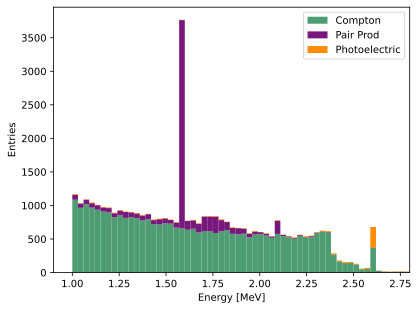

In [12]:
# Get the hit tables and plot the total energy deposited in the TPC
# Sum the energy of the hits and bin into a histogram
hit_tot_energy = hits_v[0][hits_v[0].label == "ACTIVE"]
hit_tot_energy = hit_tot_energy.groupby('event_id')['energy'].sum().reset_index(name='hit_tot_energy')

# Also merge this event energy into the main dataframe
# Merge the original DataFrame with the summed energy DataFrame based on 'event'
hits_contained_df = pd.merge(hits_v[0], hit_tot_energy, on='event_id')
plt.figure()

pair  = hit_tot_energy[hit_tot_energy.event_id.isin(pair_ev_ids)]
compt = hit_tot_energy[hit_tot_energy.event_id.isin(compt_ev_ids)]
photo = hit_tot_energy[hit_tot_energy.event_id.isin(photopeak_ev_ids)]

plt.hist([compt.hit_tot_energy, pair.hit_tot_energy, photo.hit_tot_energy], bins=np.arange(0.4, 3, 0.03), stacked=True, label=["Compton", "Pair Prod", "Photoelectric"], color=['#4e9c72', '#78187d', 'darkorange']);

# plt.hist(hit_tot_energy.hit_tot_energy, bins = 100, histtype="step", color = "black");
plt.legend()
plt.ylabel("Entries")
plt.xlabel("Energy [MeV]")
plt.xlim(0.9,2.8)
plt.savefig("../../../Projects/Bremsstrahlung/TechnicalNote/Images/EventSpectrum.pdf")

Double escape events

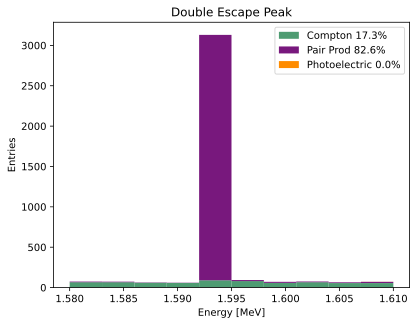

In [13]:
# Get the DE peak events
DE_hits = hits_contained_df[(hits_contained_df.hit_tot_energy > 1.58) & (hits_contained_df.hit_tot_energy < 1.61)  ]
DE_event_ids = DE_hits.event_id

# plt.figure()
# weights = scale_factor*np.ones(len(hit_tot_energy[hit_tot_energy.event_id.isin(PP_event_ids)]))
# plt.hist(hit_tot_energy[hit_tot_energy.event_id.isin(PP_event_ids)].hit_tot_energy, weights = weights);

plt.figure()
tot_events = len(compt[compt.event_id.isin(DE_event_ids)]) + len(pair[pair.event_id.isin(DE_event_ids)]) + len(photo[photo.event_id.isin(DE_event_ids)]) 
compt_frac = 100 * len(compt[compt.event_id.isin(DE_event_ids)]) / tot_events
pair_frac  = 100 * len(pair[pair.event_id.isin(DE_event_ids)]) / tot_events
photo_frac = 100 * len(photo[photo.event_id.isin(DE_event_ids)]) / tot_events

plt.hist([compt[compt.event_id.isin(DE_event_ids)].hit_tot_energy, pair[pair.event_id.isin(DE_event_ids)].hit_tot_energy, photo[photo.event_id.isin(DE_event_ids)].hit_tot_energy], bins=np.arange(1.58, 1.61, 0.003), stacked=True, label=[f"Compton {compt_frac:.1f}%", f"Pair Prod {pair_frac:.1f}%", f"Photoelectric {photo_frac:.1f}%"], color=['#4e9c72', '#78187d', 'darkorange']);
plt.legend()
plt.ylabel("Entries")
plt.xlabel("Energy [MeV]")
plt.title("Double Escape Peak")
plt.savefig("../../../Projects/Bremsstrahlung/TechnicalNote/Images/EventSpectrumDE.pdf")


### Photopeak events

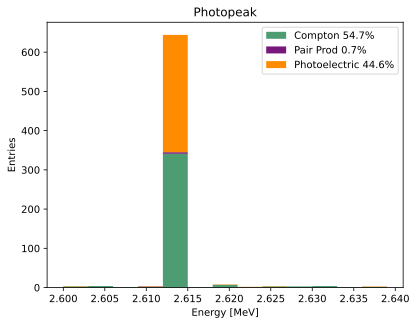

In [14]:
# Get the DE peak events
PP_hits = hits_contained_df[(hits_contained_df.hit_tot_energy > 2.6) & (hits_contained_df.hit_tot_energy < 2.64) ]
PP_event_ids = PP_hits.event_id

# plt.figure()
# weights = scale_factor*np.ones(len(hit_tot_energy[hit_tot_energy.event_id.isin(PP_event_ids)]))
# plt.hist(hit_tot_energy[hit_tot_energy.event_id.isin(PP_event_ids)].hit_tot_energy, weights = weights, bins = np.arange(2.6,2.64, 0.005));


plt.figure()
tot_events = len(compt[compt.event_id.isin(PP_event_ids)]) + len(pair[pair.event_id.isin(PP_event_ids)]) + len(photo[photo.event_id.isin(PP_event_ids)]) 
compt_frac = 100 * len(compt[compt.event_id.isin(PP_event_ids)]) / tot_events
pair_frac  = 100 * len(pair[pair.event_id.isin(PP_event_ids)]) / tot_events
photo_frac = 100 * len(photo[photo.event_id.isin(PP_event_ids)]) / tot_events

plt.hist([compt[compt.event_id.isin(PP_event_ids)].hit_tot_energy, pair[pair.event_id.isin(PP_event_ids)].hit_tot_energy, photo[photo.event_id.isin(PP_event_ids)].hit_tot_energy], bins=np.arange(2.6, 2.64, 0.003), stacked=True, label=[f"Compton {compt_frac:.1f}%", f"Pair Prod {pair_frac:.1f}%", f"Photoelectric {photo_frac:.1f}%"], color=['#4e9c72', '#78187d', 'darkorange']);
plt.legend()
plt.ylabel("Entries")
plt.xlabel("Energy [MeV]")
plt.title("Photopeak")
plt.savefig("../../../Projects/Bremsstrahlung/TechnicalNote/Images/EventSpectrumPP.pdf")


### Get all the gammas in the event and the bremsstrahlung 
- Also applies conainment requirement of the gammas 
- Applies 2 cm cut to the bremstrahlung (this accounts for voxelation, but not necissarily the diffusion yet)

In [15]:
# Plot the distance of the gammas and bin in a histogram
gammas = parts_v[0][parts_v[0]["particle_name"] == "gamma" ]

# Get all gammas that originate in the DE/PP peak
gammas_DE = gammas[gammas.event_id.isin(DE_event_ids) ]
gammas_PP = gammas[gammas.event_id.isin(PP_event_ids) ]

# Create a table of bremstrahlung gammas
eBrem_DE = gammas_DE[(gammas_DE["creator_proc"] == "eBrem")]
eBrem_PP = gammas_PP[(gammas_PP["creator_proc"] == "eBrem")]



In [16]:
n_photon_DE = []
n_photon_PP = []

# Start with DE events
eventids = eBrem_DE.event_id.unique()
for e in eventids:
    # The gammas dataframe is all gammas in the double escape peak
    event_DE = eBrem_DE[ eBrem_DE["event_id"] == e]
    n_photon_DE.append(len(event_DE))

eventids = eBrem_PP.event_id.unique()
for e in eventids:
    # The gammas dataframe is all gammas in the double escape peak
    event_PP = eBrem_PP[ eBrem_PP["event_id"] == e]
    n_photon_PP.append(len(event_PP))


#### Plot the multiplicity and the energy spectrum broken down by primary interaction mode

Text(0.5, 1.0, 'Double Escape')

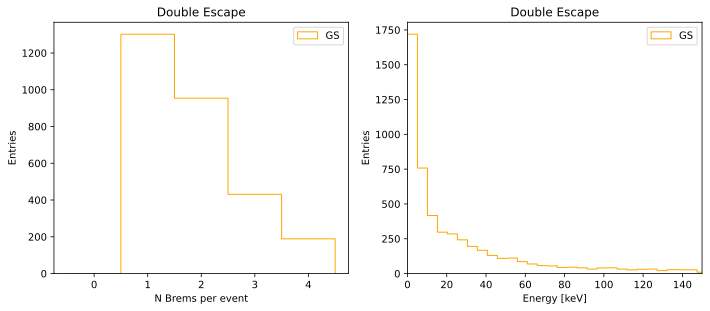

In [17]:
bin_edges = np.arange(-0.5, 5.5, 1)
bin_centers = np.arange(0, 5, 1)

plt.figure(figsize=(18, 10))  # Adjust the figure size as needed

# Multiplicities
plt.subplot(2, 3, 1);
plt.hist(n_photon_DE, bins = bin_edges, histtype="step", label = "GS", color = "orange");
plt.xlabel("N Brems per event")
plt.ylabel("Entries")
plt.xticks(bin_centers) ;
plt.legend()
plt.title("Double Escape")

# Energies
plt.subplot(2, 3, 2);
plt.hist(eBrem_DE.kin_energy*1e3, bins=np.linspace(0, 300, 60), histtype="step", label=["GS"], color = "orange");
plt.legend()
plt.xlabel("Energy [keV]")
plt.ylabel("Entries")
plt.xlim(0, 150)
plt.title("Double Escape")

#### Lookhow often a bremsstrahlung in the double escape/photopeak peak re-interacts inside the active
These are gamma daughters of the brem with final volume in the active and creator proc is not a phot which would correpond to x-rays

/Users/mistryk2/opt/anaconda3/envs/IC-3.8-2022-04-13/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc,brem_id
38570,8915027,18402,gamma,False,18379,147.55278,-35.437782,223.17569,3.592645,147.864822,...,-0.006284,0.015738,0.0,-0.0,0.0,0.029781,0.379464,compt,phot,18379


Percentage of Reinteraction gammas/ total Brem (DE):  0.017927572606669058
Mean kin energy of these gammas:  29.781300574541092 keV


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.4702187, -0.3702187, -0.2702187, -0.1702187, -0.0702187,
         0.0297813,  0.1297813,  0.2297813,  0.3297813,  0.4297813,
         0.5297813], dtype=float32),
 <BarContainer object of 10 artists>)

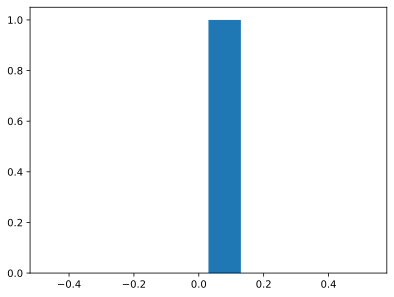

In [18]:
# display(gammas_DE[gammas_DE.event_id == 990022])

eBrem_DE_temp = eBrem_DE[["event_id", "particle_id"]]
eBrem_DE_temp.rename(columns={'particle_id': 'brem_id'}, inplace=True)

gammas_DE_merge = pd.merge(gammas_DE, eBrem_DE_temp, on='event_id', how='inner')

# display(gammas_DE_merge[gammas_DE_merge.event_id == 990022])

reint_DE_brem = gammas_DE_merge[ (gammas_DE_merge.final_volume == "ACTIVE") & (gammas_DE_merge.mother_id == gammas_DE_merge.brem_id) & (gammas_DE_merge.creator_proc != "phot")  ]

display(reint_DE_brem)

print("Percentage of Reinteraction gammas/ total Brem (DE): ", 100*len(reint_DE_brem)/len(eBrem_DE))
print("Mean kin energy of these gammas: ", reint_DE_brem.kin_energy.mean()*1000, "keV")

plt.figure()
plt.hist(reint_DE_brem.kin_energy)

In [19]:

eBrem_PP_temp = eBrem_PP[["event_id", "particle_id"]]
eBrem_PP_temp.rename(columns={'particle_id': 'brem_id'}, inplace=True)

gammas_PP_merge = pd.merge(gammas_PP, eBrem_PP_temp, on='event_id', how='inner')

# display(gammas_DE_merge[gammas_DE_merge.event_id == 990022])

reint_PP_brem = gammas_PP_merge[ (gammas_PP_merge.final_volume == "ACTIVE") & (gammas_PP_merge.mother_id == gammas_PP_merge.brem_id) & (gammas_PP_merge.creator_proc != "phot")  ]

display(reint_PP_brem)

print("Percentage of Reinteraction gammas / total Brem (PP): ", 100*len(reint_PP_brem)/len(eBrem_PP))
print("Mean kin energy of these gammas: ", reint_PP_brem.kin_energy.mean()*1000, "keV")


/Users/mistryk2/opt/anaconda3/envs/IC-3.8-2022-04-13/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc,brem_id
8568,8585034,55117,gamma,False,55107,239.091278,121.020248,50.438297,3.124332,240.948547,...,0.001166,0.000155,0.0,0.0,0.0,0.004097,1.938858,compt,phot,55107


Percentage of Reinteraction gammas / total Brem (PP):  0.06798096532970768
Mean kin energy of these gammas:  4.097179975360632 keV


#### Lets now look at the reconstructed stuff

(0.9, 2.8)

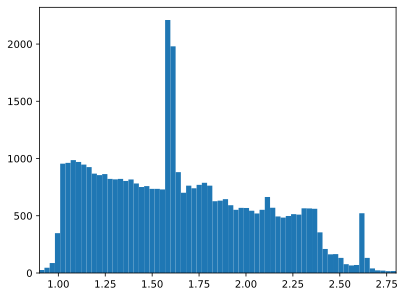

In [21]:
# Now lets plot the energy distribution of the esmeralda hits

# Sum the energy of the hits and bin into a histogram
chit_tot_energy = chits_v[0].groupby('event')['Ec'].sum().reset_index(name='hit_tot_energy')

plt.figure()
# plt.hist(chit_tot_energy.hit_tot_energy, bins = np.arange(2.5, 2.65, 0.005));
plt.hist(chit_tot_energy.hit_tot_energy, bins = 100);
plt.xlim(0.9,2.8)

,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
1484,5001,1.000329e+10,0,-154.792377,-270.982966,1,-189.175,-325.425,0.0,0.0,655.550171,5.217391,4557.000000,-1.0,0.010081,-1,-1.0
1485,5001,1.000329e+10,0,-154.792377,-270.982966,1,-173.625,-309.875,0.0,0.0,656.429077,9.217391,1625.000000,-1.0,0.003517,-1,-1.0
1486,5001,1.000329e+10,0,-154.792377,-270.982966,1,-173.625,-325.425,0.0,0.0,657.277405,6.782609,1910.000000,-1.0,0.004188,-1,-1.0
1487,5001,1.000329e+10,0,-154.792377,-270.982966,1,-173.625,-325.425,0.0,0.0,658.161926,6.260870,455.977600,-1.0,0.001000,-1,-1.0
1488,5001,1.000329e+10,0,-154.792377,-270.982966,1,-173.625,-309.875,0.0,0.0,658.161926,10.028986,730.408630,-1.0,0.001581,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49231307,1090028,2.180057e+12,0,207.253979,-6.916209,1,273.325,45.275,0.0,0.0,685.972839,8.811594,2249.000000,-1.0,0.004756,-1,-1.0
49231308,1090028,2.180057e+12,0,207.253979,-6.916209,1,257.775,29.725,0.0,0.0,686.829346,5.043478,520.902222,-1.0,0.001099,-1,-1.0
49231309,1090028,2.180057e+12,0,207.253979,-6.916209,1,257.775,45.275,0.0,0.0,686.829346,6.260870,646.637207,-1.0,0.001367,-1,-1.0
49231310,1090028,2.180057e+12,0,207.253979,-6.916209,1,257.775,60.825,0.0,0.0,686.829346,7.072464,730.460571,-1.0,0.001551,-1,-1.0


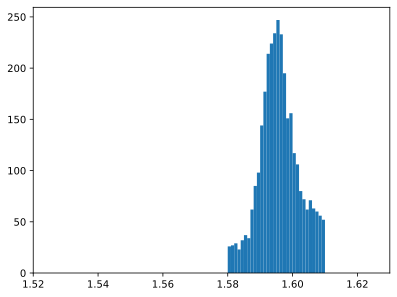

In [22]:
# Get the reco events in the DE peak
reco_DE_event_ids      = chit_tot_energy[(chit_tot_energy.hit_tot_energy > 1.58) & (chit_tot_energy.hit_tot_energy < 1.61)  ].event

reco_DE_events = chits_v[0][chits_v[0].event.isin(reco_DE_event_ids)]

# Also apply cut so that we look at events in the MC sample
# reco_DE_events = chits_v[0][chits_v[0].event.isin(eBrem_contained.event_id.unique())] 

display(reco_DE_events)
# print(reco_DE_events.event.unique())

plt.figure()
plt.hist(chit_tot_energy[chit_tot_energy.event.isin(reco_DE_event_ids)].hit_tot_energy, bins = np.arange(1.525, 1.625, 1e-3)); # Energy resolution paper uses 1 keV bins


# Plot the visible bremstrahlung and their energy distribution in true 
- Define the visible bremsstrahlung as a brem with distance greater than 3 cm

In [23]:
bin_edges = np.arange(-0.5, 5.5, 1)
bin_centers = np.arange(0, 5, 1)

eventids = gammas.event_id.unique()

n_photon_v = []
E_brem_pair = [] # Bremsstrahlung energies from pair production
E_brem_compt = [] # Bremsstrahlung energies from compton scattering

E_gamma = [] # Gamma energies


for e in eventids:

    # The gammas dataframe is all gammas in the double escape peak
    event_gamma = gammas[ gammas["event_id"] == e]

    # Get the bremsstrahlung
    all_Brem  =  event_gamma[  (event_gamma["creator_proc"] == "eBrem")  ]
    not_Brem  =  event_gamma[  (event_gamma["creator_proc"]  != "eBrem")  ]

    # Containment
    all_Brem = all_Brem[all_Brem.final_volume == "ACTIVE"]
    not_Brem = not_Brem[not_Brem.final_volume == "ACTIVE"]

    # Differentiate the compton from pair conv events 
    PairConv_Brem = all_Brem[all_Brem.event_id.isin(pair_cov_gamma_ev_ids) ]
    Compt_Brem    = all_Brem[~all_Brem.event_id.isin(pair_cov_gamma_ev_ids) ]

    # Remove gammas less than 0.5 MeV (to get rid of the primary gamma from the decay and stuff like the annihilation ones)
    not_Brem =  not_Brem[ not_Brem.kin_energy < 0.5]
    
    # Pair Prod events
    E_brem_event_pair = PairConv_Brem['kin_energy'].tolist()
    E_brem_pair = E_brem_pair + E_brem_event_pair

    # Pair Prod events
    E_brem_event_compt = Compt_Brem['kin_energy'].tolist()
    E_brem_compt = E_brem_compt + E_brem_event_compt

    # Get the energy of the gammas that are not brem
    E_gamma_event = not_Brem['kin_energy'].tolist()
    E_gamma = E_gamma + E_gamma_event
    
    n_photon_v.append(len(PairConv_Brem))
    # n_photon_v.append(len(PairConv_Brem[PairConv_Brem.kin_energy>5e-3]))# This is if we want to apply an energy cut 

NameError: name 'pair_cov_gamma_ev_ids' is not defined

In [ ]:
plt.figure(figsize=(18, 10))  # Adjust the figure size as needed

# Multiplicities
plt.subplot(2, 3, 1);
plt.hist(n_photon_v, bins = bin_edges, color=cmap(0));
plt.xlabel("N Brems per event")
plt.ylabel("Entries")
plt.xticks(bin_centers) ;

# Energies
plt.subplot(2, 3, 2);
E_brem_pair_scale = np.full_like(E_brem_pair, 1.0)
E_brem_compt_scale = np.full_like(E_brem_compt, 1.0)
E_gamma_scale = np.full_like(E_gamma, 1.0)

plt.hist([np.array(E_brem_pair)*1e3, np.array(E_brem_compt)*1e3, np.array(E_gamma)*1e3], bins=np.linspace(0, 300, 60),weights=[E_brem_pair_scale,E_brem_compt_scale, E_gamma_scale], stacked=True, alpha=0.7, label=["Brems e+e- (sig)","Brems e- (bkg)","Gamma Other (bkg)"]);
plt.legend(title="Stacked")
plt.xlabel("Energy [keV]")
plt.ylabel("Entries")
plt.xlim(0, 150)

## Plot the events in 2D and 3D 

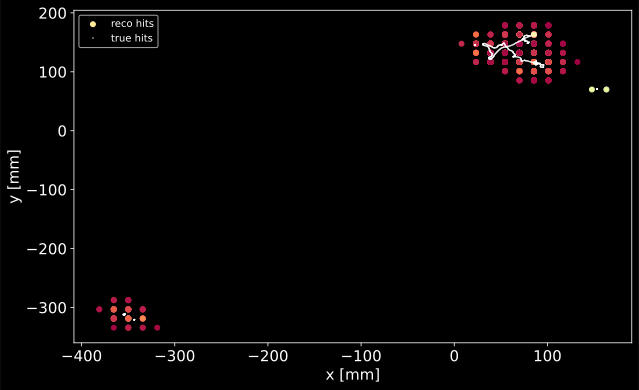

In [ ]:
%matplotlib inline
# Plot a reco event
ev_id = 1270130

reco_event = chits_v[0][chits_v[0].event == ev_id]

event = DE_hits[DE_hits.event_id == ev_id]
# event_brem = eBrem_contained[eBrem_contained.event_id == ev_id ]
# event_gamma = gammas_contained[gammas_contained.event_id == ev_id ]

fig, ax  = plt.subplots(figsize=(10, 6))
fig.set_facecolor('black')
ax.set_facecolor('black')
plt.scatter(reco_event.X, reco_event.Y,c= reco_event.Ec, cmap='Spectral', s=25, label = "reco hits")
plt.plot(event.x, event.y, ".", c = "white", ms = 1, label = "true hits")
# plt.scatter(event_gamma.final_x,event_gamma.final_y, color = "g", marker = "*", s = 100, label = "gamma")
# plt.scatter(event_brem.final_x,event_brem.final_y, color = "yellow", marker = "*",s = 100, label = "Brem")


plt.xlabel("x [mm]", fontsize = 15)
plt.ylabel("y [mm]", fontsize = 15)
plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

# Set the color of the axes labels and ticks to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Set the color of the spines (borders) to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
legend = plt.legend(facecolor = "black")
# Set the text color of the legend
for text in legend.get_texts():
    text.set_color('white')  # Set the text color to red

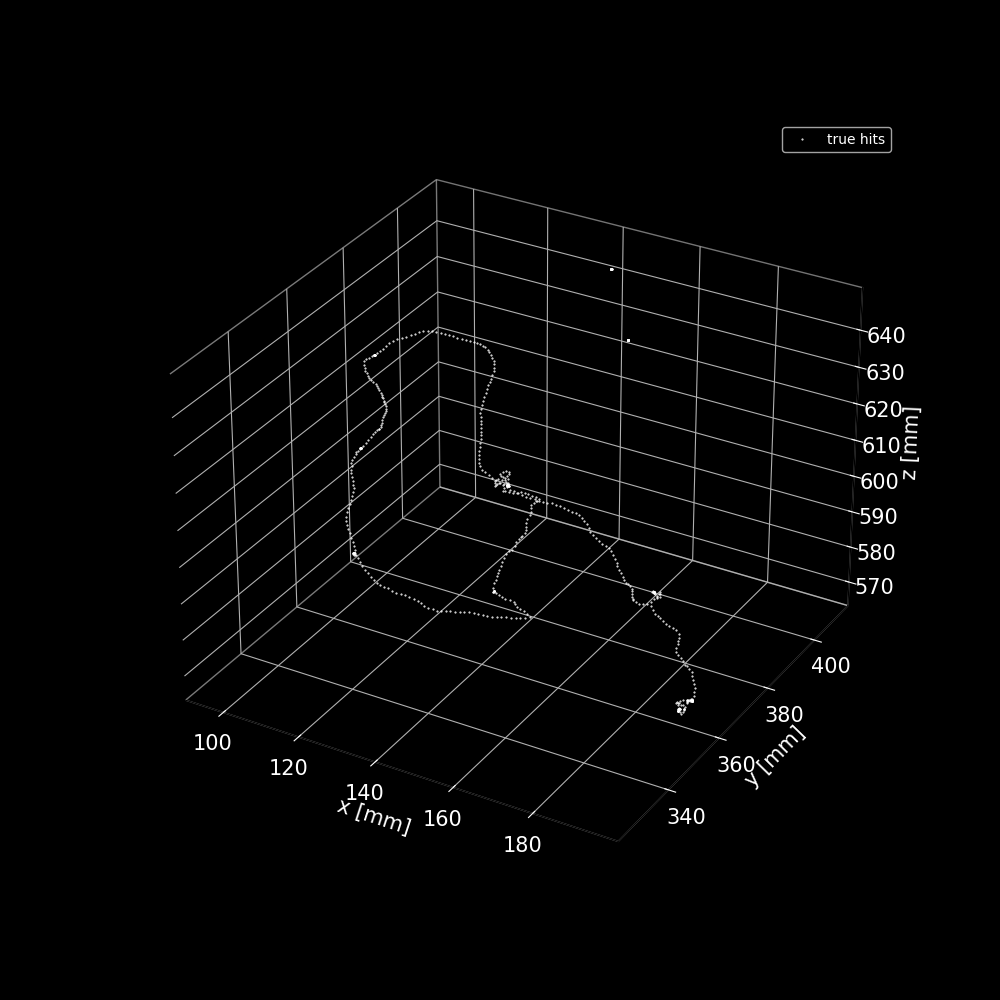

In [ ]:
%matplotlib widget
# Make a 3D view of the track
fig  = plt.figure(figsize=(10, 10))

# Create 3D axes
ax = fig.add_subplot(111, projection='3d')

fig.set_facecolor('black')
ax.set_facecolor('black')
# ax.scatter(reco_event.X, reco_event.Y,  reco_event.Z,c= reco_event.Ec, cmap='Spectral', s=25, label = "reco hits")
plt.plot(event.x, event.y,event.z, ".", c = "white", ms = 1, label = "true hits")
# ax.scatter(event_gamma.final_x,event_gamma.final_y, event_gamma.final_z, color = "g", marker = "*", s = 100, label = "gamma")
# ax.scatter(event_brem.final_x,event_brem.final_y, event_brem.final_z, color = "yellow", marker = "*",s = 100, label = "Brem")


ax.set_xlabel("x [mm]", fontsize = 15)
ax.set_ylabel("y [mm]", fontsize = 15)
ax.set_zlabel("z [mm]", fontsize = 15)
plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

# Set the color of the axes labels and ticks to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.zaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')

# Set the color of the spines (borders) to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Remove background (axis)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

legend = plt.legend(facecolor = "black")

# Set the text color of the legend
for text in legend.get_texts():
    text.set_color('white')  # Set the text color to red